<a href="https://colab.research.google.com/github/miftahcoiri354/bangkit-final-project/blob/branch_miftah/Final_Project_Signal_Project_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Colab Library to upload files to notebook
from google.colab import files
files.upload() #upload kaggle.json (You can get the files from Kaggle API Token at My Account)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miftahcoiri","key":"490608e5f81f31b67f3791509039e77c"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle kernels list — user miftahcoiri — sort-by dateRun
!kaggle datasets download -d datamunge/sign-language-mnist

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: — user miftahcoiri — sort-by dateRun
 91% 57.0M/62.6M [00:00<00:00, 48.2MB/s]
100% 62.6M/62.6M [00:00<00:00, 98.7MB/s]


In [4]:
from zipfile import ZipFile

z = ZipFile('sign-language-mnist.zip')
zip_files = z.infolist()

zip_files

[<ZipInfo filename='amer_sign2.png' compress_type=deflate file_size=487452 compress_size=486808>,
 <ZipInfo filename='amer_sign3.png' compress_type=deflate file_size=44527 compress_size=42724>,
 <ZipInfo filename='american_sign_language.PNG' compress_type=deflate file_size=208007 compress_size=207142>,
 <ZipInfo filename='sign_mnist_test.csv' compress_type=deflate file_size=21777485 compress_size=6687945>,
 <ZipInfo filename='sign_mnist_test/sign_mnist_test.csv' compress_type=deflate file_size=21777485 compress_size=6687945>,
 <ZipInfo filename='sign_mnist_train.csv' compress_type=deflate file_size=83281065 compress_size=25759739>,
 <ZipInfo filename='sign_mnist_train/sign_mnist_train.csv' compress_type=deflate file_size=83281065 compress_size=25759739>]

In [5]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
#Import the test and train datasets into pandas dataframe
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [8]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,182,182,181,181,182,181,181,181,181,179,178,178,176,177,178,159,47,30,39,180,182,183,183,183,183,185,184,185,183,184,...,97,97,95,90,92,101,125,160,191,202,213,215,96,88,109,216,208,207,203,178,151,112,87,80,76,80,86,97,102,103,108,132,170,194,214,203,197,205,209,215


In [9]:
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,175,176,175,174,174,173,173,174,170,172,172,170,171,171,170,168,168,167,166,176,176,176,176,176,176,177,177,176,178,178,...,198,200,199,199,197,197,197,196,194,193,192,191,199,201,190,190,194,192,187,181,154,72,66,74,54,139,210,198,201,201,201,200,197,198,198,197,195,195,193,192


In [0]:
y_train1 = train_df['label']
y_test1 = test_df['label']
del train_df['label']
del test_df['label']

In [11]:
y_train1

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [12]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train1)
y_test = label_binarizer.fit_transform(y_test1)
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [13]:
x_train = train_df.values
x_test = test_df.values
x_train  

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [14]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255
x_train.shape

(27455, 784)

In [15]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape

(27455, 28, 28, 1)

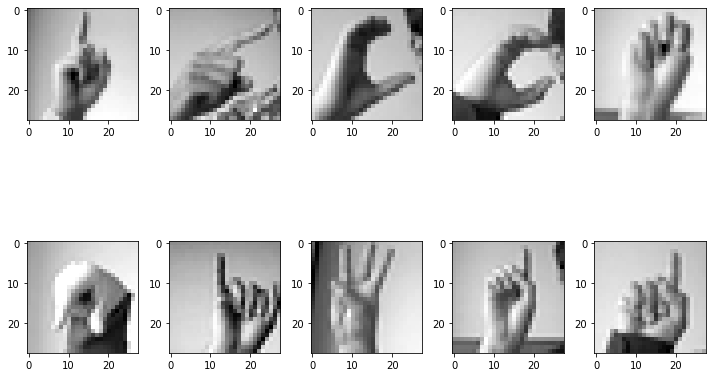

In [16]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [0]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , 
                 strides = 1 , 
                 padding = 'same' , 
                 activation = 'relu' , 
                 input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , 
                    strides = 2 , 
                    padding = 'same'))
model.add(Conv2D(50 , (3,3) , 
                 strides = 1 , 
                 padding = 'same' , 
                 activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , 
                    strides = 2 , 
                    padding = 'same'))
model.add(Conv2D(25 , (3,3) , 
                 strides = 1 , 
                 padding = 'same' , 
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , 
                    strides = 2 , 
                    padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , 
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , 
                activation = 'softmax'))

model.compile(optimizer = 'adam' , 
              loss = 'categorical_crossentropy' , 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)         

In [20]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128),
                    epochs = 20 , validation_data = (x_test, y_test), 
                    callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 15s 69ms/step - loss: 1.0400 - accuracy: 0.6704 - val_loss: 3.9312 - val_accuracy: 0.1033
Epoch 2/20
215/215 [==============================] - 8s 36ms/step - loss: 0.2164 - accuracy: 0.9299 - val_loss: 1.3893 - val_accuracy: 0.5510
Epoch 3/20
215/215 [==============================] - 8s 36ms/step - loss: 0.0968 - accuracy: 0.9685 - val_loss: 0.0957 - val_accuracy: 0.9739
Epoch 4/20
215/215 [==============================] - 8s 36ms/step - loss: 0.0638 - accuracy: 0.9792 - val_loss: 0.0303 - val_accuracy: 0.9929
Epoch 5/20
215/215 [==============================] - 8s 37ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0258 - val_accuracy: 0.9934
Epoch 6/20
215/215 [==============================] - 8s 36ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0445 - val_accuracy: 0.9851
Epoch 7/20
215/215 [==============================] - 8s 36ms/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 0.0428 - val_accuracy: 0.985

In [21]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 1s 100us/step
Accuracy of the model is -  100.0 %


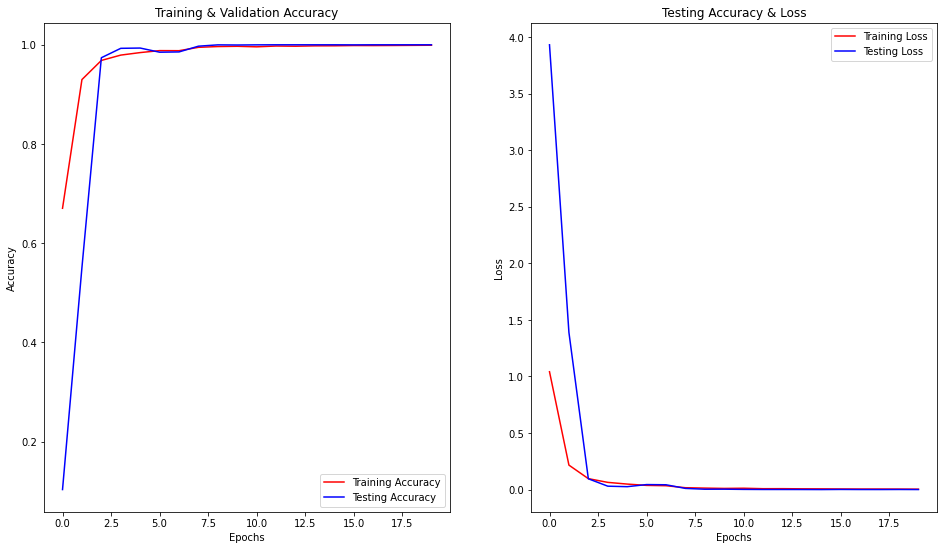

In [22]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'r-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'b-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'r-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'b-' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [33]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

print(predictions[:100]) #prediction labels using ML
print(np.array(y_test1[:100])) #original labels from dataset

[ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7  2  0 21  4
 10 15  2 15  7  1  7  8 13 19  3 21 13  3 18 14 15 23  8 15 14  5 17  4
 19 13 20 22 20  5 16 16 21  4  7 22 10 13 11 22  2 10  1  4 18  4 20  6
 15  4  3 20 15 11  2  2 17  2  7 21 23  7 12 17 24 14  2  1  7 23  8  5
  0  0 19 21]
[ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7  2  0 21  4
 10 15  2 15  7  1  7  8 13 19  3 21 13  3 18 14 15 23  8 15 14  5 17  4
 19 13 20 22 20  5 16 16 21  4  7 22 10 13 11 22  2 10  1  4 18  4 20  6
 15  4  3 20 15 11  2  2 17  2  7 21 23  7 12 17 24 14  2  1  7 23  8  5
  0  0 19 21]


In [37]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y_test1, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

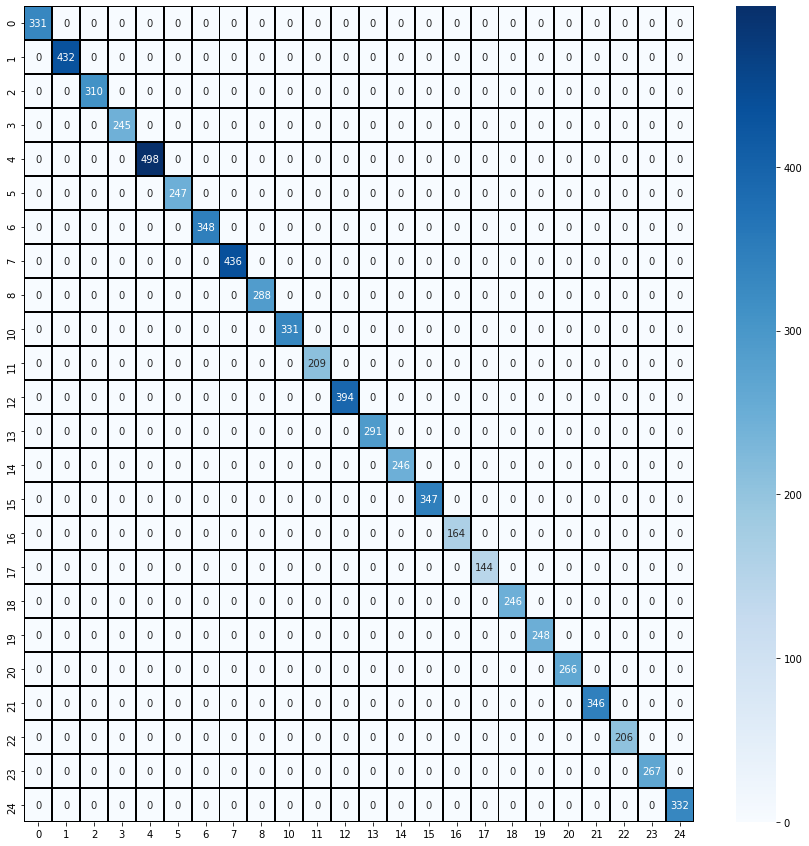

In [38]:
cm = confusion_matrix(y_test1,predictions)
cm = pd.DataFrame(cm , 
                  index = [i for i in range(25) if i != 9] , 
                  columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black' , 
            linewidth = 1 , 
            annot = True, fmt='')

In [0]:
correct = np.nonzero(predictions == np.array(y_test1))[0]

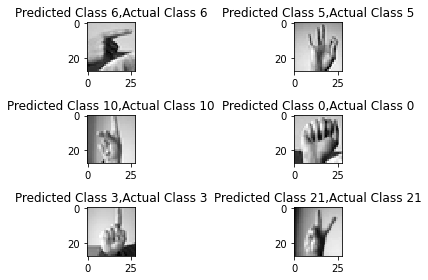

In [43]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test1[c]))
    plt.tight_layout()
    i += 1